In [46]:
import pandas as pd
import numpy as np
import math
from pandasql import sqldf

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [75]:
df_train = pd.read_csv(r'C:\Users\1994a\Documents\TitanicSpaceshipClassification\train.csv')

In [54]:
df_train.shape

(8693, 14)

In [5]:
#pd.set_option('display.max_rows', None)

#### Data Visualization

<Axes: xlabel='Age', ylabel='Transported'>

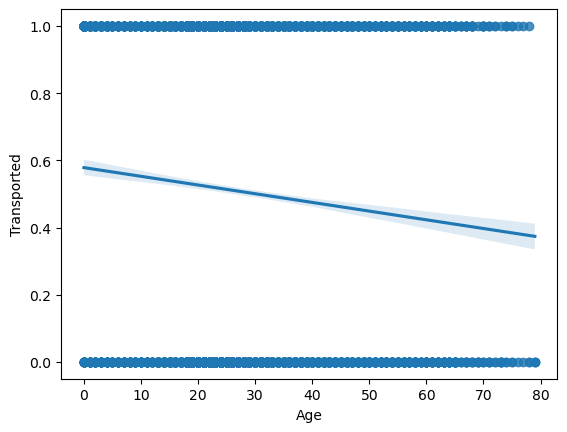

In [55]:
# loading dataset
sns.regplot(data=df_train, x="Age", y="Transported")

<Axes: xlabel='Transported', ylabel='Age'>

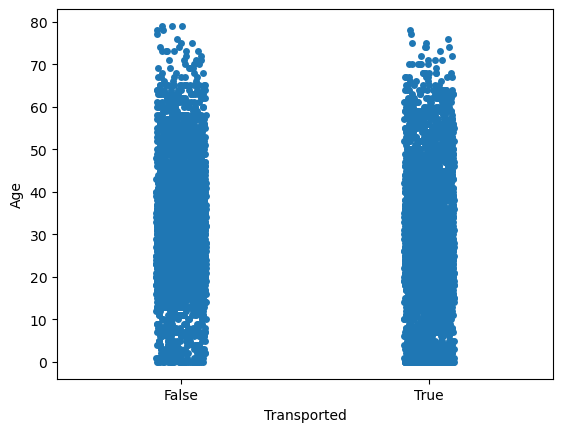

In [56]:
sns.stripplot(x ='Transported', y ='Age', data = df_train, 
              jitter = True, dodge = True)

<Axes: xlabel='Transported', ylabel='Age'>

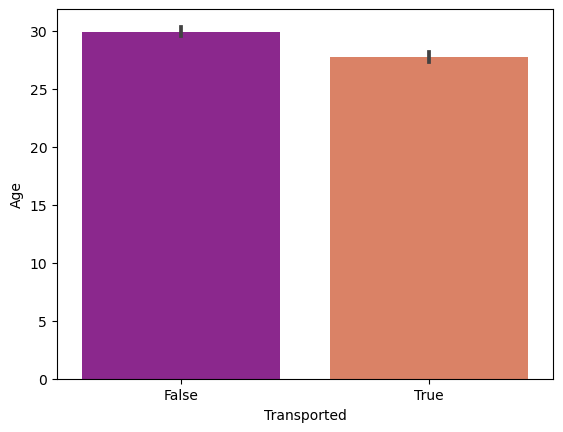

In [57]:
# plot the graph using the default estimator mean
sns.barplot(x ='Transported', y ='Age', data = df_train, palette ='plasma')

In [10]:
#sns.catplot(x="HomePlanet", y="Age", hue="Transported", kind="swarm", data=df_train)

E:\AppInstalled\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


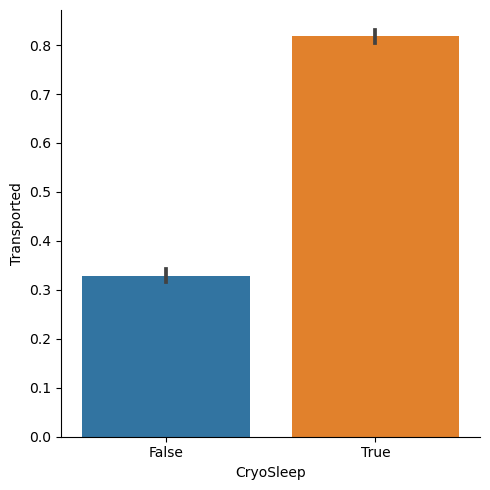

In [58]:
sns.catplot(kind='bar', x='CryoSleep', y='Transported',data=df_train)

E:\AppInstalled\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


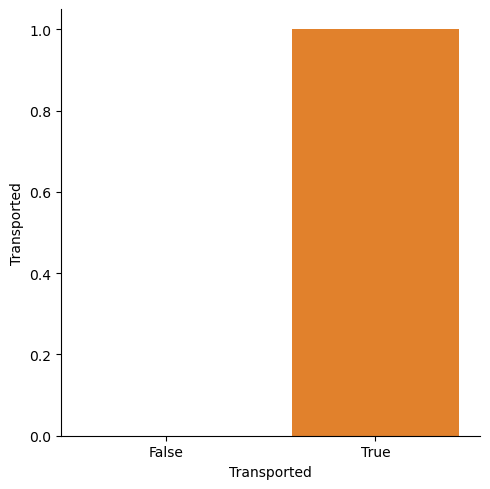

In [59]:
sns.catplot(kind='bar', x='Transported', y='Transported',data=df_train)

<Axes: xlabel='Age', ylabel='Count'>

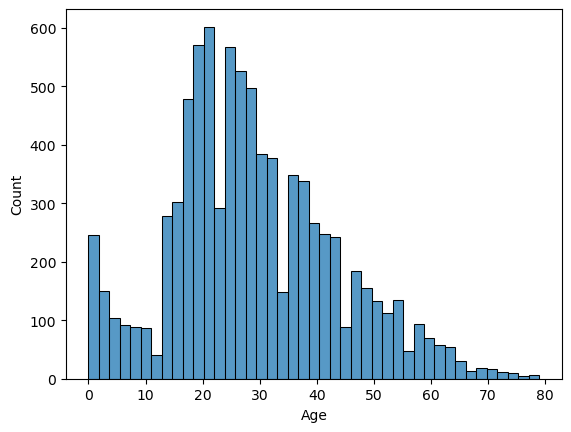

In [60]:
sns.histplot(df_train['Age'])

<Axes: xlabel='Age', ylabel='Count'>

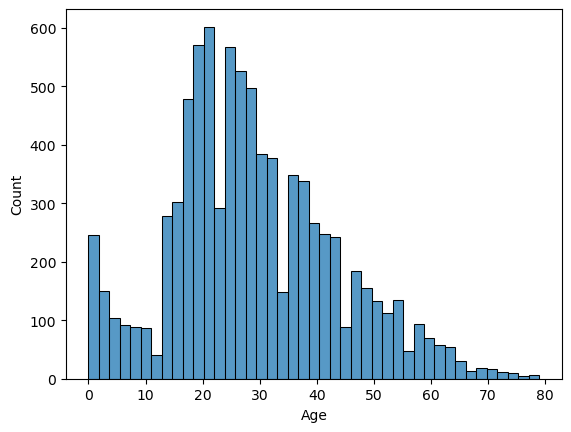

In [61]:
sns.histplot(df_train.loc[df_train['Age'].notna()]['Age'])

#### Data Cleaning

In [16]:
# df_train['HomePlanet'].fillna(method='ffill', inplace=True)
# df_train['Cabin'].fillna(method='ffill', inplace=True)
# df_train['Destination'].fillna(method='ffill', inplace=True)
# df_train['VIP'].fillna(method='ffill', inplace=True)

In [76]:
df_actual_test = pd.read_csv(r'C:\Users\1994a\Documents\TitanicSpaceshipClassification\test.csv')

In [17]:
#df_work1 = df_work.loc[:, ['PassengerId', 'HomePlanetCorrected', 'CryoSleepCorrected', 'DestinationCorrected', 'Age', 'VIPCorrected', 'RoomServiceCorrected', 'FoodCourtCorrected', 'ShoppingMallCorrected', 'SpaCorrected', 'VRDeckCorrected']]

In [77]:
def get_null_values_per_columns(df_check):
    print('________get_null_values_per_columns________________')
    for col in df_check.columns:
        tot_null_values = df_check[col].isnull().sum() 
        tot_not_null_values = df_check[col].notnull().sum() 
        print(col, tot_null_values, ' percentage: ', (tot_null_values/(tot_null_values + tot_not_null_values))*100)

In [81]:
def row_wise_initial_column_correction(df_work, type_df):
    print('_________data_cleaning_____________')
    ## Creating New Column
    df_work['PassengerGroupId'] = df_work.PassengerId.str[:4]
    print('1 = ', df_work.shape)
    for index, row in df_work.iterrows():
        # Column HomePlanet Correction 
        passenger_group_id = str(row["PassengerGroupId"])
        if pd.isna(row['HomePlanet']):

            if df_work.loc[(df_work['PassengerGroupId'] == passenger_group_id) & (~df_work['HomePlanet'].isna())]['HomePlanet'].empty:
                    df_work.loc[index, 'HomePlanetCorrected'] = np.nan
            else:
                df_work.loc[index, 'HomePlanetCorrected'] = df_work.loc[(df_work['PassengerGroupId'] == passenger_group_id) & (~df_work['HomePlanet'].isna())]['HomePlanet'].values[0]
        else:
            df_work.loc[index, 'HomePlanetCorrected'] = row['HomePlanet']

        # Column Destination Correction 
        if pd.isna(row['Destination']):
            if df_work.loc[(df_work['PassengerGroupId'] == passenger_group_id) & (~df_work['Destination'].isna())]['Destination'].empty:
                    df_work.loc[index, 'DestinationCorrected'] = np.nan
            else:
                df_work.loc[index, 'DestinationCorrected'] = df_work.loc[(df_work['PassengerGroupId'] == passenger_group_id) & (~df_work['Destination'].isna())]['Destination'].values[0]
        else:
            df_work.loc[index, 'DestinationCorrected'] = row['Destination']

        # Column Cabin Correction 
        if pd.isna(row['Cabin']):

            if df_work.loc[(df_work['PassengerGroupId'] == passenger_group_id) & (~df_work['Cabin'].isna())]['Cabin'].empty:
                    df_work.loc[index, 'CabinCorrected'] = np.nan
            else:
                df_work.loc[index, 'CabinCorrected'] = df_work.loc[(df_work['PassengerGroupId'] == passenger_group_id) & (~df_work['Cabin'].isna())]['Cabin'].values[0]
        else:
            df_work.loc[index, 'CabinCorrected'] = row['Cabin']

        ## Column VIP Correction
        if pd.isna(row['VIP']):
            df_work.loc[index, 'VIPCorrected'] = False
        else:
            df_work.loc[index, 'VIPCorrected'] = row['VIP']


        ## Column RoomService Correction
        if pd.isna(row['RoomService']):
            df_work.loc[index, 'RoomServiceCorrected'] = False
        else:
            df_work.loc[index, 'RoomServiceCorrected'] = row['RoomService']

        ## Column FoodCourt Correction
        if pd.isna(row['FoodCourt']):
            df_work.loc[index, 'FoodCourtCorrected'] = False
        else:
            df_work.loc[index, 'FoodCourtCorrected'] = row['FoodCourt']

        ## Column ShoppingMall Correction
        if pd.isna(row['ShoppingMall']):
            df_work.loc[index, 'ShoppingMallCorrected'] = False
        else:
            df_work.loc[index, 'ShoppingMallCorrected'] = row['ShoppingMall']   

        ## Column Spa Correction
        if pd.isna(row['Spa']):
            df_work.loc[index, 'SpaCorrected'] = False
        else:
            df_work.loc[index, 'SpaCorrected'] = row['Spa']      

        ## Column VRDeck Correction
        if pd.isna(row['VRDeck']):
            df_work.loc[index, 'VRDeckCorrected'] = False
        else:
            df_work.loc[index, 'VRDeckCorrected'] = row['VRDeck']   


        ## Column CryoSleep Correction
        if pd.isna(row['CryoSleep']):
            df_work.loc[index, 'CryoSleepCorrected'] = False
        else:
            df_work.loc[index, 'CryoSleepCorrected'] = row['CryoSleep']   
    
    
    return df_work

In [71]:
def new_dataframe_based_on_required_columns(df_work, type_df):
    print('_________new_dataframe_based_on_required_columns__________')
    ## Creating new dataframe based on required columns of existing dataframe
    if type_df == 'train':
        df_work = df_work.loc[:, ['PassengerId', 'HomePlanetCorrected', 'CryoSleepCorrected', 'DestinationCorrected', 'Age', 'VIPCorrected', 'RoomServiceCorrected', 'FoodCourtCorrected', 'ShoppingMallCorrected', 'SpaCorrected', 'VRDeckCorrected', 'Transported']]       
    elif type_df == 'test':
        df_work = df_work.loc[:, ['PassengerId', 'HomePlanetCorrected', 'CryoSleepCorrected', 'DestinationCorrected', 'Age', 'VIPCorrected', 'RoomServiceCorrected', 'FoodCourtCorrected', 'ShoppingMallCorrected', 'SpaCorrected', 'VRDeckCorrected']]
    
    return df_work

In [72]:
def correcting_column_boolean_values(df_work, type_df):
    print('_____________correcting_column_boolean_values___________________')
    # Correcting column with boolean values from object to bool type
    m = {True: True, False:False}
    df_work['CryoSleepCorrected'] = df_work['CryoSleepCorrected'].map(m)
    df_work['VIPCorrected'] = df_work['VIPCorrected'].map(m)


    # Converting True value as 1 and False as 0
    m = {True: 1, False:0}
    df_work['CryoSleepCorrected'] = df_work['CryoSleepCorrected'].map(m)
    df_work['VIPCorrected'] = df_work['VIPCorrected'].map(m)
    
    if type_df == 'train':
        df_work['Transported'] = df_work['Transported'].map(m)
    
    return df_work

In [91]:
def converting_float_data_type(df_work):
    print('___________converting_float_data_type_______________')
    # Converting to Float Data Type
    df_work['RoomServiceCorrected'] = df_work['RoomServiceCorrected'].astype(float)
    df_work['FoodCourtCorrected'] = df_work['FoodCourtCorrected'].astype(float)
    df_work['ShoppingMallCorrected'] = df_work['ShoppingMallCorrected'].astype(float)
    df_work['SpaCorrected'] = df_work['SpaCorrected'].astype(float)
    df_work['VRDeckCorrected'] = df_work['VRDeckCorrected'].astype(float)
    
    return df_work

In [74]:
def data_fill_na(df_work):
    print('______________data_fill_na__________________')
    # Fill na accordingly
    df_work['HomePlanetCorrected'] = df_work['HomePlanetCorrected'].fillna(df_work.groupby('HomePlanetCorrected')['HomePlanetCorrected'].count().sort_values(ascending=False).index[0])
    df_work['DestinationCorrected'] = df_work['DestinationCorrected'].fillna(df_work.groupby('DestinationCorrected')['DestinationCorrected'].count().sort_values(ascending=False).index[0])
    df_work['Age'] = df_work['Age'].fillna(math.floor(df_work['Age'].median()))
    
    return df_work

In [78]:
# Get initial null values for df_train
get_null_values_per_columns(df_train)

________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanet 201  percentage:  2.312205222592891
CryoSleep 217  percentage:  2.4962613597147127
Cabin 199  percentage:  2.289198205452663
Destination 182  percentage:  2.093638559760727
Age 179  percentage:  2.0591280340503855
VIP 203  percentage:  2.3352122397331185
RoomService 181  percentage:  2.082135051190613
FoodCourt 183  percentage:  2.105142068330841
ShoppingMall 208  percentage:  2.392729782583688
Spa 183  percentage:  2.105142068330841
VRDeck 188  percentage:  2.1626596111814105
Name 200  percentage:  2.300701714022777
Transported 0  percentage:  0.0


In [79]:
# Get initial null values for df_actual_test
get_null_values_per_columns(df_actual_test)

________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanet 87  percentage:  2.034136076689268
CryoSleep 93  percentage:  2.1744213233574934
Cabin 100  percentage:  2.338087444470423
Destination 92  percentage:  2.1510404489127897
Age 91  percentage:  2.127659574468085
VIP 93  percentage:  2.1744213233574934
RoomService 82  percentage:  1.917231704465747
FoodCourt 106  percentage:  2.4783726911386488
ShoppingMall 98  percentage:  2.2913256955810146
Spa 101  percentage:  2.3614683189151275
VRDeck 80  percentage:  1.8704699555763384
Name 94  percentage:  2.197802197802198


In [80]:
# copy 
df_train1 = df_train.copy()
df_actual_test1 = df_actual_test.copy()

In [82]:
df_train2 = row_wise_initial_column_correction(df_train1, 'train').copy()

_________data_cleaning_____________
1 =  (8693, 15)


In [83]:
df_actual_test2 = row_wise_initial_column_correction(df_actual_test1, 'test').copy()

_________data_cleaning_____________
1 =  (4277, 14)


In [84]:
get_null_values_per_columns(df_train2)
print('___________________________________')
get_null_values_per_columns(df_actual_test2)

________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanet 201  percentage:  2.312205222592891
CryoSleep 217  percentage:  2.4962613597147127
Cabin 199  percentage:  2.289198205452663
Destination 182  percentage:  2.093638559760727
Age 179  percentage:  2.0591280340503855
VIP 203  percentage:  2.3352122397331185
RoomService 181  percentage:  2.082135051190613
FoodCourt 183  percentage:  2.105142068330841
ShoppingMall 208  percentage:  2.392729782583688
Spa 183  percentage:  2.105142068330841
VRDeck 188  percentage:  2.1626596111814105
Name 200  percentage:  2.300701714022777
Transported 0  percentage:  0.0
PassengerGroupId 0  percentage:  0.0
HomePlanetCorrected 111  percentage:  1.2768894512826412
DestinationCorrected 103  percentage:  1.18486138272173
CabinCorrected 99  percentage:  1.1388473484412747
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:

In [87]:
df_train3 = new_dataframe_based_on_required_columns(df_train2, 'train').copy()
df_actual_test3 = new_dataframe_based_on_required_columns(df_actual_test2, 'test').copy()

_________new_dataframe_based_on_required_columns__________
_________new_dataframe_based_on_required_columns__________


In [89]:
df_train4 = correcting_column_boolean_values(df_train3,'train').copy()
df_actual_test4 = correcting_column_boolean_values(df_actual_test3, 'test').copy()

_____________correcting_column_boolean_values___________________
_____________correcting_column_boolean_values___________________


In [92]:
df_train5 = converting_float_data_type(df_train4).copy()
df_actual_test5 = converting_float_data_type(df_actual_test4).copy()

___________converting_float_data_type_______________
___________converting_float_data_type_______________


In [93]:
get_null_values_per_columns(df_train5)
print('_____________________________________________________________________________________')
get_null_values_per_columns(df_actual_test5)

________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanetCorrected 111  percentage:  1.2768894512826412
CryoSleepCorrected 0  percentage:  0.0
DestinationCorrected 103  percentage:  1.18486138272173
Age 179  percentage:  2.0591280340503855
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:  0.0
SpaCorrected 0  percentage:  0.0
VRDeckCorrected 0  percentage:  0.0
Transported 0  percentage:  0.0
_____________________________________________________________________________________
________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanetCorrected 46  percentage:  1.0755202244563948
CryoSleepCorrected 0  percentage:  0.0
DestinationCorrected 51  percentage:  1.1924245966799158
Age 91  percentage:  2.127659574468085
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage

In [94]:
df_train6 = data_fill_na(df_train5).copy()
df_actual_test6 = data_fill_na(df_actual_test5).copy()

______________data_fill_na__________________
______________data_fill_na__________________


In [95]:
get_null_values_per_columns(df_train6)
print('_____________________________________________________________________________________')
get_null_values_per_columns(df_actual_test6)

________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanetCorrected 0  percentage:  0.0
CryoSleepCorrected 0  percentage:  0.0
DestinationCorrected 0  percentage:  0.0
Age 0  percentage:  0.0
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:  0.0
SpaCorrected 0  percentage:  0.0
VRDeckCorrected 0  percentage:  0.0
Transported 0  percentage:  0.0
_____________________________________________________________________________________
________get_null_values_per_columns________________
PassengerId 0  percentage:  0.0
HomePlanetCorrected 0  percentage:  0.0
CryoSleepCorrected 0  percentage:  0.0
DestinationCorrected 0  percentage:  0.0
Age 0  percentage:  0.0
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:  0.0
SpaCorrected 0  percentage:  0.0
VRDeckCorrecte

In [37]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(df_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(df_actual_test))

# Imputation removed column names; put them back
imputed_X_train.columns = df_train.columns
imputed_X_valid.columns = df_actual_test.columns

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Europa'

In [ ]:
# Count unique Home Planets
df_train['HomePlanetCorrected'].groupby(df_train['HomePlanetCorrected']).filter(lambda x: len(x) > 1).value_counts()

In [ ]:
#Count unique Destination Planets
df_train['DestinationCorrected'].groupby(df_train['DestinationCorrected']).filter(lambda x: len(x) > 1).value_counts()

In [96]:
X = df_train6.copy()
y = X.Transported
X.drop(['Transported'], axis=1, inplace=True)

In [97]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [99]:
def cleaning_one_hot_encoding(X_train, X_test, X_actualtest):
    """Handling category type data"""
    print('__________cleaning_one_hot_encoding___________')
    # Applying one-hot encoder to column with categorical data
    OH_encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)

    object_cat_cols = ['HomePlanetCorrected', 'DestinationCorrected']
    OH_X_train=pd.DataFrame(OH_encoder.fit_transform(X_train[object_cat_cols]))
    OH_X_test = pd.DataFrame(OH_encoder.transform(X_test[object_cat_cols]))
    OH_X_actualtest = pd.DataFrame(OH_encoder.transform(X_actualtest[object_cat_cols]))
    
    # One-hot encoding removed index; put it back
    OH_X_train.index = X_train.index
    OH_X_test.index = X_test.index
    OH_X_actualtest.index = X_actualtest.index

    # Remove categorical columnns (will replace with one-hot encoding)
    num_X_train = X_train.drop(object_cat_cols, axis=1)
    num_X_test = X_test.drop(object_cat_cols, axis=1)
    num_X_actualtest = X_actualtest.drop(object_cat_cols, axis=1)
    
    # Add one-hot encoded columns to numerical features
    OH_X_train = pd.concat([num_X_train, OH_X_train], axis=1)
    OH_X_test = pd.concat([num_X_test, OH_X_test], axis=1)
    OH_X_actualtest = pd.concat([num_X_actualtest, OH_X_actualtest], axis=1)
    
    # Ensure all columns have string type
    OH_X_train.columns = OH_X_train.columns.astype(str)
    OH_X_test.columns= OH_X_test.columns.astype(str)
    OH_X_actualtest.columns= OH_X_actualtest.columns.astype(str)
    
    return OH_X_train, OH_X_test, OH_X_actualtest


In [100]:
X_train, X_test, X_actualtest = cleaning_one_hot_encoding(X_train, X_test, df_actual_test6)

__________cleaning_one_hot_encoding___________


E:\AppInstalled\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [101]:
X_train.head(2)

,PassengerId,CryoSleepCorrected,Age,VIPCorrected,RoomServiceCorrected,FoodCourtCorrected,ShoppingMallCorrected,SpaCorrected,VRDeckCorrected,0,1,2,3,4,5
4278,4558_01,0,54.0,0,0.0,559.0,0.0,15238.0,2799.0,0.0,1.0,0.0,1.0,0.0,0.0
5971,6326_01,0,20.0,0,0.0,20.0,1.0,696.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [102]:
X_test.head(2)

,PassengerId,CryoSleepCorrected,Age,VIPCorrected,RoomServiceCorrected,FoodCourtCorrected,ShoppingMallCorrected,SpaCorrected,VRDeckCorrected,0,1,2,3,4,5
3601,3868_05,0,16.0,0,0.0,0.0,623.0,40.0,209.0,1.0,0.0,0.0,1.0,0.0,0.0
6057,6405_02,0,2.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [103]:
X_actualtest.head(2)

,PassengerId,CryoSleepCorrected,Age,VIPCorrected,RoomServiceCorrected,FoodCourtCorrected,ShoppingMallCorrected,SpaCorrected,VRDeckCorrected,0,1,2,3,4,5
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [104]:
X_actualtest.shape

(4277, 15)

##### Model Implimentation

In [105]:
model1 = RandomForestClassifier(n_estimators=100, random_state=0)


In [106]:
model2 = DecisionTreeClassifier()

In [107]:
model3 = LogisticRegression(random_state=0)

In [108]:
model4 =  svm.SVC()

In [109]:
def test_score(model):
    print('_______test_score________')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    preds_actual = model.predict(X_actualtest)
    mae = mean_absolute_error(y_test, preds)
    score = accuracy_score(y_test, preds)
    print('model: {}, mae: {}, score: {}, '.format(model, mae, score))
    return model, preds, preds_actual

In [110]:
model, preds, preds_actual = test_score(model1)

_______test_score________
model: RandomForestClassifier(random_state=0), mae: 0.22254169062679702, score: 0.777458309373203, 


In [111]:
X_actualtest.shape

(4277, 15)

In [112]:
len(preds_actual)

4277

In [113]:
preds_actual

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
type(preds_actual)

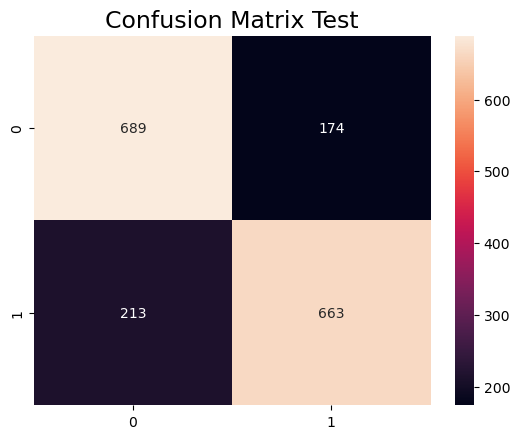

In [114]:
cm = confusion_matrix(y_test.to_numpy(),preds)
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.title('Confusion Matrix Test',fontsize=17)
plt.show()

In [115]:
# Creating result dataframe from result array
df_actual_result = pd.DataFrame(data = preds_actual,    
columns = ['Transported'])

In [116]:
df_actual_result.head(2)

,Transported
0,1
1,0


In [117]:
df_actual_result.shape

(4277, 1)

In [118]:
X_actualtest.columns

Index(['PassengerId', 'CryoSleepCorrected', 'Age', 'VIPCorrected',
       'RoomServiceCorrected', 'FoodCourtCorrected', 'ShoppingMallCorrected',
       'SpaCorrected', 'VRDeckCorrected', '0', '1', '2', '3', '4', '5'],
      dtype='object')

In [119]:
X_actualtest['Transported'] = preds_actual

In [120]:
X_actualtest.shape

(4277, 16)

In [121]:
X_actualtest.columns

Index(['PassengerId', 'CryoSleepCorrected', 'Age', 'VIPCorrected',
       'RoomServiceCorrected', 'FoodCourtCorrected', 'ShoppingMallCorrected',
       'SpaCorrected', 'VRDeckCorrected', '0', '1', '2', '3', '4', '5',
       'Transported'],
      dtype='object')

In [122]:
# Generate csv
header = ['PassengerId', 'Transported']
X_actualtest.to_csv('sample_submission.csv', columns=header, index=False)